# Regression linéaire

In [27]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=1, noise=5, random_state=42)

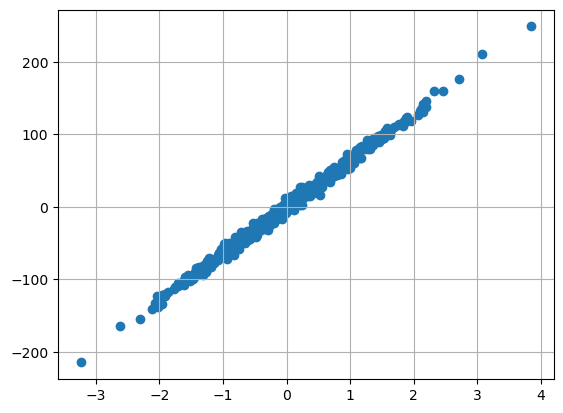

In [28]:
import matplotlib.pyplot as plt 

plt.scatter(X,y)
plt.grid()

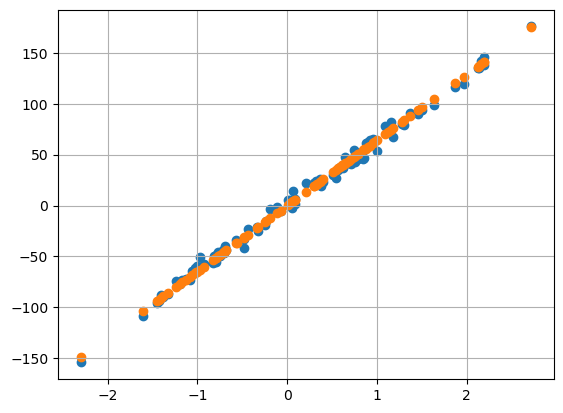

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.grid()

Epoch 1/50
13/13 [==============================] - 0s 13ms/step - loss: 3317.4875 - mean_squared_error: 3317.4875 - val_loss: 2885.7883 - val_mean_squared_error: 2885.7883
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 2043.0535 - mean_squared_error: 2043.0535 - val_loss: 1767.1288 - val_mean_squared_error: 1767.1288
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 1259.6637 - mean_squared_error: 1259.6637 - val_loss: 1088.3560 - val_mean_squared_error: 1088.3560
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 784.5193 - mean_squared_error: 784.5193 - val_loss: 676.7202 - val_mean_squared_error: 676.7202
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 494.2168 - mean_squared_error: 494.2168 - val_loss: 419.8517 - val_mean_squared_error: 419.8517
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 312.7511 - mean_squared_error: 312.7511 - val_loss: 264.7303 - val_mean_squ

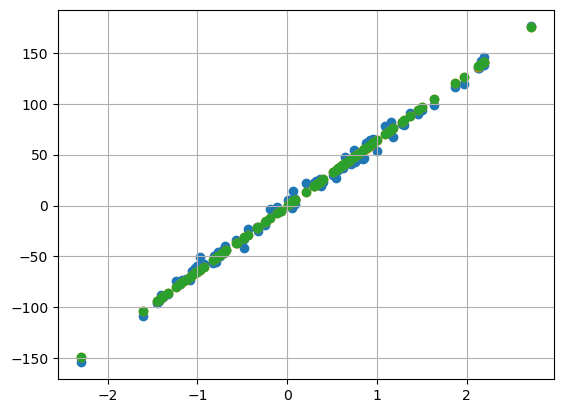

In [32]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential 

modelnn = Sequential()

# output 
modelnn.add(Dense(units=1, activation="linear"))

modelnn.compile(optimizer="sgd", loss="mse", metrics=["mean_squared_error"])

hist = modelnn.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

y_prednn = modelnn.predict(x_test)

plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_prednn)
plt.grid()


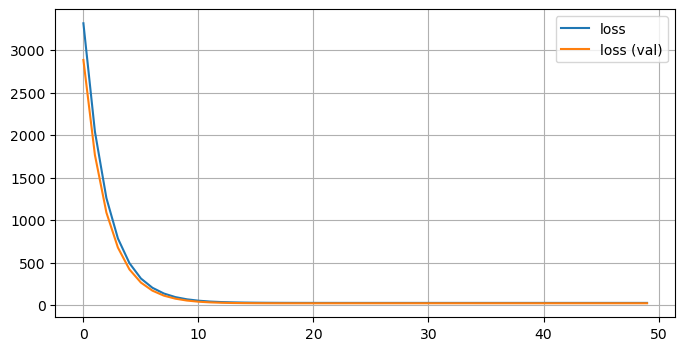

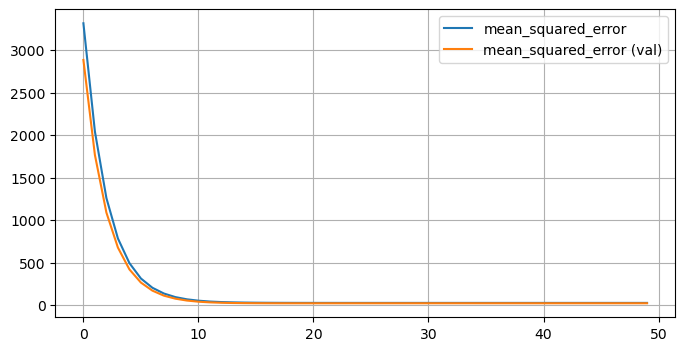

In [35]:
hist.history.keys()

plt.figure(figsize=(8,4))
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(hist.history["mean_squared_error"],label="mean_squared_error")
plt.plot(hist.history["val_mean_squared_error"],label="mean_squared_error (val)")
plt.grid()

plt.legend()

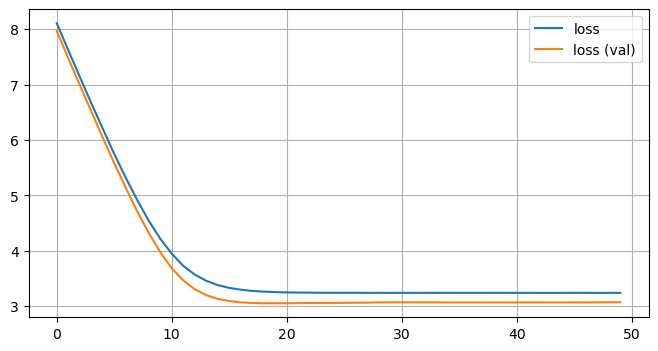

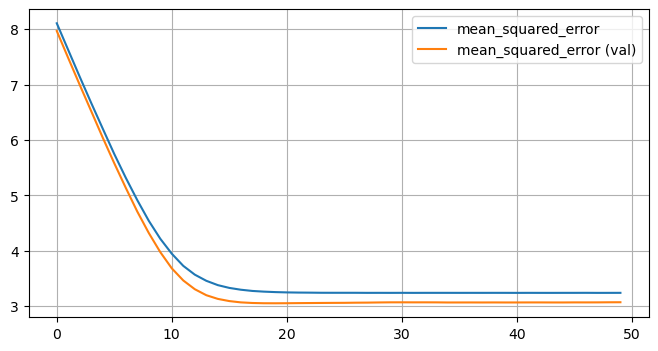

In [36]:
import numpy as np
plt.figure(figsize=(8,4))
plt.plot(np.log(hist.history["loss"]),label="loss")
plt.plot(np.log(hist.history["val_loss"]),label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(np.log(hist.history["mean_squared_error"]),label="mean_squared_error")
plt.plot(np.log(hist.history["val_mean_squared_error"]),label="mean_squared_error (val)")
plt.grid()
plt.legend()

# classification

In [37]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=20)


In [40]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print( classification_report(y_pred, y_test) )

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        52
           1       0.79      0.92      0.85        48

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



In [54]:
model_cl = Sequential()
model_cl.add(Dense(units=1, activation="sigmoid"))

model_cl.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

histcl = model_cl.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

y_prednn = model_cl.predict(x_test)

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.6968 - accuracy: 0.6325 - val_loss: 0.7776 - val_accuracy: 0.5600
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.6500 - val_loss: 0.7509 - val_accuracy: 0.5600
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.6650 - val_loss: 0.7263 - val_accuracy: 0.5800
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6800 - val_loss: 0.7044 - val_accuracy: 0.6300
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.6900 - val_loss: 0.6849 - val_accuracy: 0.6500
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5817 - accuracy: 0.7150 - val_loss: 0.6676 - val_accuracy: 0.6700
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5656 - accuracy: 0.7275 - val_loss: 0.6513 - val_accuracy: 0.6900
Epoch 8/100


In [49]:
print( classification_report(np.round(y_prednn), y_test) )

              precision    recall  f1-score   support

         0.0       0.93      0.77      0.85        53
         1.0       0.79      0.94      0.85        47

    accuracy                           0.85       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100



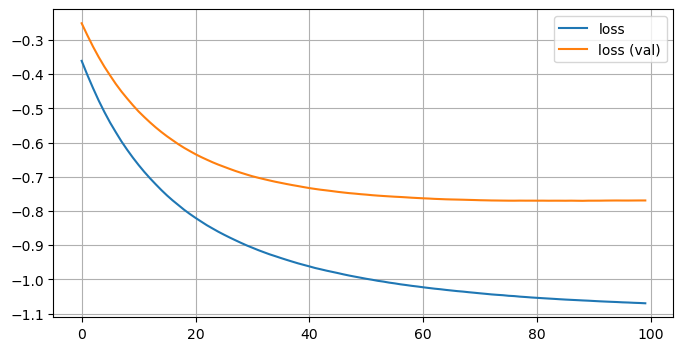

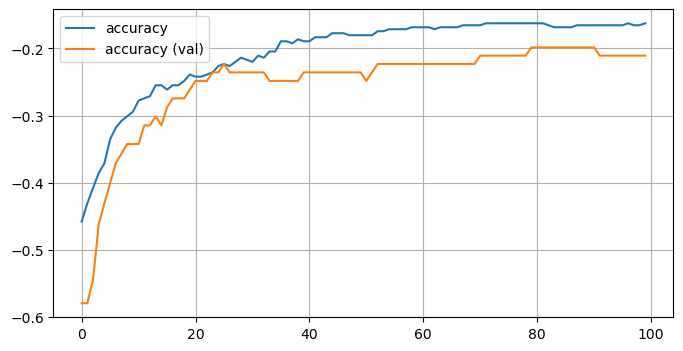

In [55]:
import numpy as np
plt.figure(figsize=(8,4))
plt.plot(np.log(histcl.history["loss"]),label="loss")
plt.plot(np.log(histcl.history["val_loss"]),label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(np.log(histcl.history["accuracy"]),label="accuracy")
plt.plot(np.log(histcl.history["val_accuracy"]),label="accuracy (val)")
plt.grid()
plt.legend()